In [121]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn import linear_model
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

In [122]:
#parse_data argument is used to oragnize the format of the PERIOD field/column
df = pd.read_csv('csvFiles/AVERAGE TEMPERATURE.csv', parse_dates=['PERIOD'])
df

,PERIOD,AverageTemperature
0,1853-01-01,24.219
1,1853-02-01,23.765
2,1853-03-01,25.812
3,1853-04-01,26.842
4,1853-05-01,27.647
...,...,...
1915,2012-08-01,27.586
1916,2012-09-01,27.328
1917,2012-10-01,26.862
1918,2012-11-01,27.144


In [123]:
#Check for Null values in data set and remove values
df.isnull().sum()
#New data set
df = df.dropna()
#Check again for null values
df.isnull().sum()

PERIOD                0
AverageTemperature    0
dtype: int64

In [124]:
#Separete month and year from PERIOD field / create dummy fields
df['PERIOD'] = pd.to_datetime(df['PERIOD'])
df['Year'], df['Month'] = df['PERIOD'].dt.year, df['PERIOD'].dt.month

<ipython-input-124-d1fb9e97ab56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PERIOD'] = pd.to_datetime(df['PERIOD'])
<ipython-input-124-d1fb9e97ab56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'], df['Month'] = df['PERIOD'].dt.year, df['PERIOD'].dt.month


In [125]:
#new df
df

,PERIOD,AverageTemperature,Year,Month
0,1853-01-01,24.219,1853,1
1,1853-02-01,23.765,1853,2
2,1853-03-01,25.812,1853,3
3,1853-04-01,26.842,1853,4
4,1853-05-01,27.647,1853,5
...,...,...,...,...
1915,2012-08-01,27.586,2012,8
1916,2012-09-01,27.328,2012,9
1917,2012-10-01,26.862,2012,10
1918,2012-11-01,27.144,2012,11


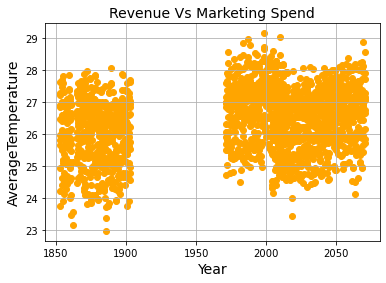

In [126]:
#plot values
plt.scatter(df['Year'], df['AverageTemperature'], color='orange')
plt.xlabel('Year', fontsize=14)
plt.ylabel('AverageTemperature', fontsize=14)
plt.grid(True)
plt.title('Revenue Vs Marketing Spend', fontsize=14)
plt.show()

In [127]:
#Create model
X = df[['Year','Month']]
y = df['AverageTemperature']
regr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)
regr.fit(X_train, y_train)
predictions = regr.predict(X_train)

In [128]:
#Print Metrics
print('The Accuracy on the training dataset is: ', regr.score(X_train, y_train) )
print('The Accuracy on the testing dataset is: ', regr.score(X_test, y_test) )

The Accuracy on the training dataset is:  0.07388664963937974
The Accuracy on the testing dataset is:  0.06089365409760239


In [129]:
#Test predict
pred = regr.predict([[2013,5]])
pred

array([26.52430987])

Text(0.5, 1.0, 'Actuals Vs Predicted Values')

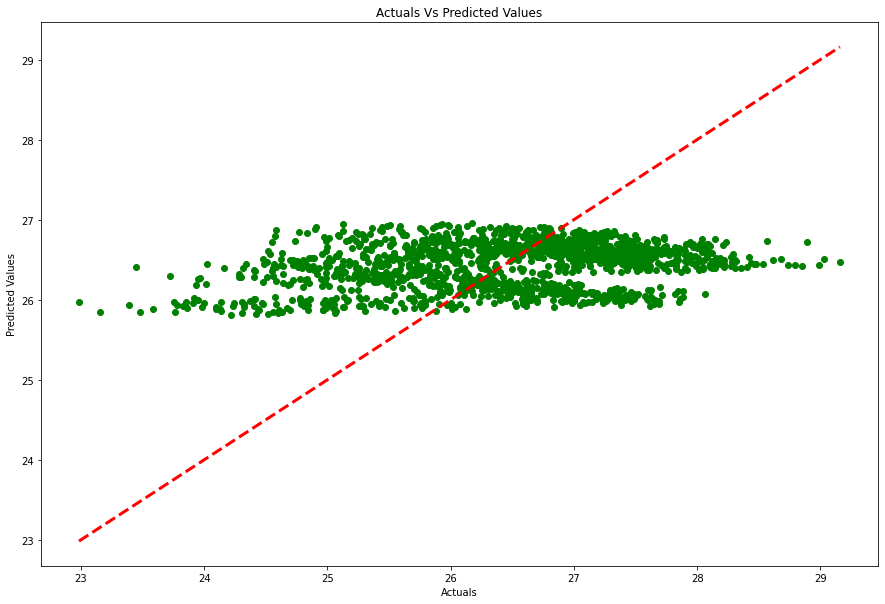

In [130]:
# Plotting Actuals Vs Predicted
plt.figure(figsize=(15,10))
plt.scatter(y_train, predictions, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actuals Vs Residuals')

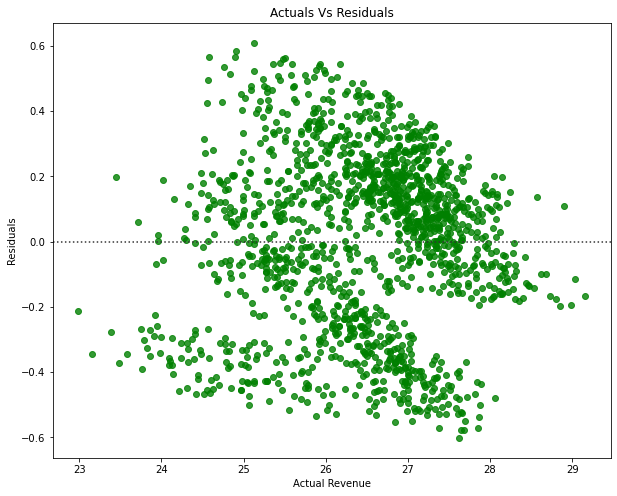

In [133]:
plt.figure(figsize=(10,8))
sns.residplot(y_train, predictions, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')